1. Find the total DSH payments each state receives in total in 2011 (aggregated from all hospitals for the state).

2. Find the numbers for year 2015.

3. Find how much DSH payments has increased in each state ((2) - (1)).
4. Label each state as "expansion states" or "non-expansion states", according to whether they decided to expand Medicaid following the Affordable Care Act. (Have I send you the list of expansion states?)
5. Use a logistic regression model to describe the relation between DSH increase and expansion/non-expansion. Is there a strong correlation? If so, it may support the argument that Medicaid expansion helped reduce the DSH payments (which makes sense since DSH payments covers uncompensated care caused by uninsured individuals, and under Medicaid expansion there should be fewer uninsured people in these states)

*repeat process for 2011 vs 2013 and compare results

In [1]:
#importing necessary libraries for data cleaning + analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#reading necessary csvs of dsh from years 2011, 2013, and 2015
dsh_2011 = pd.read_csv('dsh_2011.csv')
dsh_2013 = pd.read_csv('dsh_2013.csv')
dsh_2015 = pd.read_csv('dsh_2015.csv')

In [28]:
#for each important year, we grouped by the state and took the dsh column
#we then took the sum of each column to represent aggregate from all hospitals of a state
#after each sum, we renamed the dsh column with respective years 

dsh_2011 = dsh_2011.groupby('state')['dsh1','dsh2','dsh3'].sum().reset_index()
dsh_2013 = dsh_2013.groupby('state')['dsh1','dsh2','dsh3'].sum().reset_index()
dsh_2015 = dsh_2015.groupby('state')['dsh1','dsh2','dsh3'].sum().reset_index()

#this option just formats the displays of floats cleaner
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [30]:
dsh_2011['dsh2011'] = dsh_2011['dsh1'] + dsh_2011['dsh2'] + dsh_2011['dsh3']
dsh_2013['dsh2013'] = dsh_2013['dsh1'] + dsh_2013['dsh2'] + dsh_2013['dsh3']
dsh_2015['dsh2015'] = dsh_2015['dsh1'] + dsh_2015['dsh2'] + dsh_2015['dsh3']

In [32]:
dsh_2011 = dsh_2011.drop(['dsh1','dsh2','dsh3'], axis=1)
dsh_2013 = dsh_2013.drop(['dsh1','dsh2','dsh3'], axis=1)
dsh_2015 = dsh_2015.drop(['dsh1','dsh2','dsh3'], axis=1)


In [33]:
dsh_2011

,state,dsh2011
0,AK,17737577.00
1,AL,186989459.00
2,AR,107615594.00
3,AZ,176673419.00
4,CA,1769109053.00
5,CO,78478115.00
6,CT,124683945.00
7,DC,68884646.00
8,DE,35418499.00
9,FL,785288570.00


In [34]:
#full join datasets from 2011 and 2013
dsh_all = pd.merge(dsh_2011, dsh_2013, on = ['state'])

In [35]:
#full join previous generated dataset and 2015
dsh_all  = pd.merge(dsh_all, dsh_2015, on = ['state'])

In [37]:
dsh_all

,state,dsh2011,dsh2013,dsh2015
0,AK,17737577.00,23197983.00,8362462.00
1,AL,186989459.00,134820950.00,44002542.00
2,AR,107615594.00,75333821.00,38929726.00
3,AZ,176673419.00,105683970.00,56677289.00
4,CA,1769109053.00,1183518125.00,570771731.00
5,CO,78478115.00,64168931.00,37370322.00
6,CT,124683945.00,97188936.00,36930686.00
7,DC,68884646.00,35152157.00,19094285.00
8,DE,35418499.00,18458850.00,12426150.00
9,FL,785288570.00,618172065.00,194898300.00


Find how much DSH payments has increased in each state ((2) - (1)).

In [39]:
#adding a column of the difference from 2015-2011
dsh_all['2015-2011'] = 1.0*(dsh_all['dsh2015'] - dsh_all['dsh2011'])/dsh_all['dsh2011']

In [40]:
#adding a column of the difference from 2013-2011
dsh_all['2013-2011'] = 1.0*(dsh_all['dsh2013'] - dsh_all['dsh2011'])/dsh_all['dsh2011']

In [41]:
dsh_all

,state,dsh2011,dsh2013,dsh2015,2015-2011,2013-2011
0,AK,17737577.00,23197983.00,8362462.00,-0.53,0.31
1,AL,186989459.00,134820950.00,44002542.00,-0.76,-0.28
2,AR,107615594.00,75333821.00,38929726.00,-0.64,-0.30
3,AZ,176673419.00,105683970.00,56677289.00,-0.68,-0.40
4,CA,1769109053.00,1183518125.00,570771731.00,-0.68,-0.33
5,CO,78478115.00,64168931.00,37370322.00,-0.52,-0.18
6,CT,124683945.00,97188936.00,36930686.00,-0.70,-0.22
7,DC,68884646.00,35152157.00,19094285.00,-0.72,-0.49
8,DE,35418499.00,18458850.00,12426150.00,-0.65,-0.48
9,FL,785288570.00,618172065.00,194898300.00,-0.75,-0.21


In [43]:
#remove white space in state
dsh_all['state'] = dsh_all['state'].str.strip()

In [44]:
#drop states with 0 values including GU, and VI
dsh_all = dsh_all[(dsh_all!=0).all(1)].reset_index(drop=True)

In [45]:
dsh_all

,state,dsh2011,dsh2013,dsh2015,2015-2011,2013-2011
0,AK,17737577.00,23197983.00,8362462.00,-0.53,0.31
1,AL,186989459.00,134820950.00,44002542.00,-0.76,-0.28
2,AR,107615594.00,75333821.00,38929726.00,-0.64,-0.30
3,AZ,176673419.00,105683970.00,56677289.00,-0.68,-0.40
4,CA,1769109053.00,1183518125.00,570771731.00,-0.68,-0.33
5,CO,78478115.00,64168931.00,37370322.00,-0.52,-0.18
6,CT,124683945.00,97188936.00,36930686.00,-0.70,-0.22
7,DC,68884646.00,35152157.00,19094285.00,-0.72,-0.49
8,DE,35418499.00,18458850.00,12426150.00,-0.65,-0.48
9,FL,785288570.00,618172065.00,194898300.00,-0.75,-0.21


In [46]:
dsh_all = dsh_all.drop(dsh_all[dsh_all['state']== 'PR'].index)

In [47]:
dsh_all

,state,dsh2011,dsh2013,dsh2015,2015-2011,2013-2011
0,AK,17737577.00,23197983.00,8362462.00,-0.53,0.31
1,AL,186989459.00,134820950.00,44002542.00,-0.76,-0.28
2,AR,107615594.00,75333821.00,38929726.00,-0.64,-0.30
3,AZ,176673419.00,105683970.00,56677289.00,-0.68,-0.40
4,CA,1769109053.00,1183518125.00,570771731.00,-0.68,-0.33
5,CO,78478115.00,64168931.00,37370322.00,-0.52,-0.18
6,CT,124683945.00,97188936.00,36930686.00,-0.70,-0.22
7,DC,68884646.00,35152157.00,19094285.00,-0.72,-0.49
8,DE,35418499.00,18458850.00,12426150.00,-0.65,-0.48
9,FL,785288570.00,618172065.00,194898300.00,-0.75,-0.21


Label each state as "expansion states" or "non-expansion states", according to whether they decided to expand Medicaid following the Affordable Care Act. (Have I send you the list of expansion states?)

In [48]:
#read in expansion states table to append column to previous df
expansion_states = pd.read_csv('expansion_states.csv')

In [49]:
expansion_states

,state,expansion_status
0,AL,0
1,FL,0
2,GA,0
3,ID,0
4,KS,0
5,ME,0
6,MI,0
7,MO,0
8,NE,0
9,NC,0


In [50]:
#merging expansion status to previous data frame
dsh_states = pd.merge(dsh_all, expansion_states, on = ['state'], how = 'right')

In [51]:
dsh_and_states

,state,dsh_2011,dsh_2013,dsh_2015,2015-2011,2013-2011,expansion_status
0,AK,17737577.00,23197983.00,8362462.00,-0.53,0.31,1
1,AL,186843384.00,134225015.00,43686403.00,-0.77,-0.28,0
2,AZ,174554622.00,102341838.00,55650089.00,-0.68,-0.41,1
3,DE,35418499.00,18458850.00,12426150.00,-0.65,-0.48,1
4,FL,785288570.00,618161727.00,194898300.00,-0.75,-0.21,0
5,GA,334648001.00,220655350.00,78336929.00,-0.77,-0.34,0
6,HI,24760182.00,13718233.00,7953117.00,-0.68,-0.45,1
7,ID,30481928.00,27935369.00,9160497.00,-0.70,-0.08,0
8,IN,203104486.00,155833731.00,67793103.00,-0.67,-0.23,1
9,KS,60133844.00,47245112.00,16387779.00,-0.73,-0.21,0


**2015-2011** Use a logistic regression model to describe the relation between DSH increase and expansion/non-expansion. Is there a strong correlation? If so, it may support the argument that Medicaid expansion helped reduce the DSH payments 

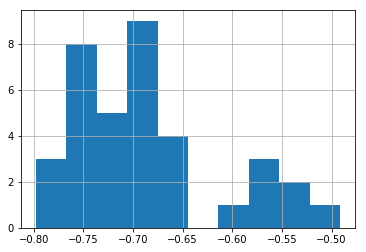

In [52]:
dsh_and_states['2015-2011'].hist()

In [53]:
from sklearn.linear_model import LogisticRegression

X = dsh_and_states[["2015-2011"]]
y = dsh_and_states["expansion_status"]

log_reg = LogisticRegression()
log_reg.fit(X, y)

/home/kereeh/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
X

,2015-2011
0,-0.53
1,-0.77
2,-0.68
3,-0.65
4,-0.75
5,-0.77
6,-0.68
7,-0.70
8,-0.67
9,-0.73


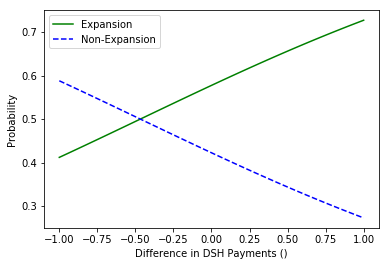

In [55]:
X_new = np.linspace(-1, 1, 100).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label = "Expansion")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Non-Expansion")
plt.xlabel("Difference in DSH Payments ()")
plt.ylabel("Probability")
plt.legend()

In [56]:
# calculate the training precision
pred = log_reg.predict(dsh_and_states[['2015-2011']])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**2013 - 2011**
Use a logistic regression model to describe the relation between DSH increase and expansion/non-expansion. Is there a strong correlation? If so, it may support the argument that Medicaid expansion helped reduce the DSH payments 